## Support for marker rotation

In [1]:
from lets_plot import *


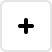
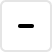
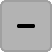
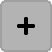
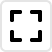
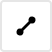
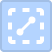
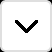
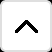
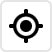
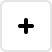
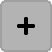
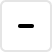
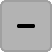
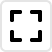
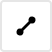
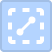
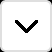
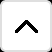
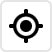

In [2]:
LetsPlot.setup_html()

In [3]:
data = {
    'x': [1, 2, 3, 4],
    'y': [1, 1, 1, 1],
    'angle': [-30, 0, 30, 60]
}

In [4]:
ggplot(data) +\
geom_point(aes(x='x', y='y', angle='angle'), size=20, shape=3.0) +\
geom_point(x=5, y=1.0, angle=90, size=20, shape=2.0, color='red')

### Circles must not rotate in target SVG

In [6]:
p = ggplot(data) +\
geom_point(aes(x='x', y='y', angle='angle'), size=20, shape='SOLID_CIRCLE_2') +\
geom_point(x=5, y=1.0, angle=90, size=20, shape=2.0, color='red')
#p.to_svg('1.svg')
p.show()